# Hierarchial Clustering Implementation

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from sklearn import datasets

In [31]:
iris = datasets.load_iris()

In [32]:
iris_data = pd.DataFrame(iris['data'], columns=iris.feature_names)

In [33]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_scaled = scaler.fit_transform(iris_data)

In [37]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [38]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)

In [48]:
pca_scaled = pca.fit_transform(X_scaled)

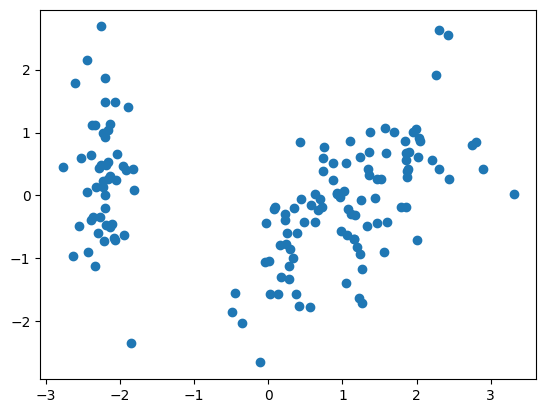

In [49]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

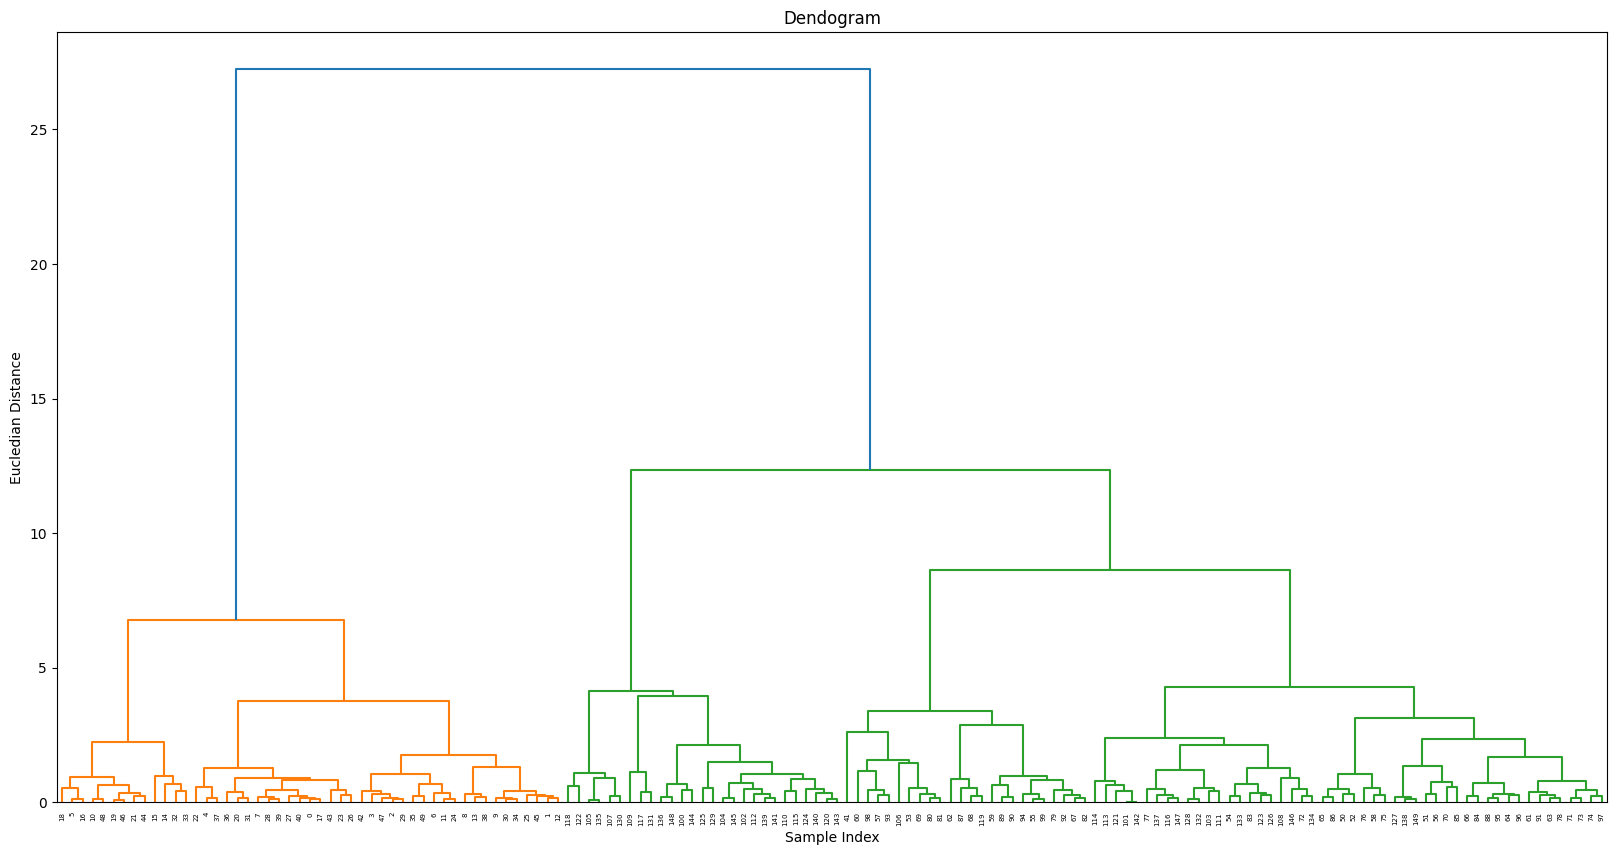

In [42]:
## Agglomerative Clustering
## To construct a dendogram

# scipy.cluster.hierarchy provides tools for hierarchical clustering.
import scipy.cluster.hierarchy as sc

# plot dendogram
plt.figure(figsize=(20,10))
plt.title("Dendogram")
# Computes hierarchical clusters using the Ward method (minimizes variance).
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
# performs Agglomerative Hierarchical Clustering on the dataset using Euclidean distance and the Ward linkage method.
cluster = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [45]:
# The cluster.labels_ attribute returns the cluster labels assigned to each data point after performing Agglomerative Clustering.
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

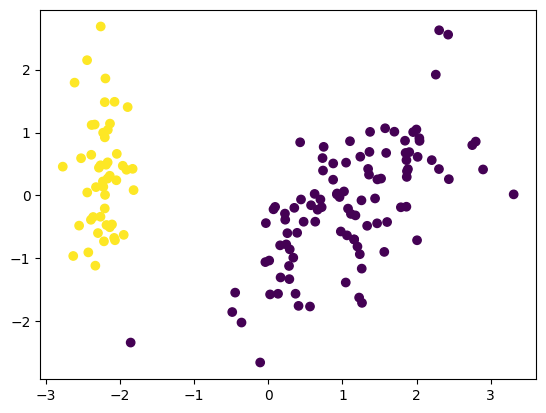

In [50]:
# Scatter plot to visualize the clusters formed by Agglomerative Clustering
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=cluster.labels_)